##Importing libararies

In [0]:
import tensorflow as tf
from keras.datasets import fashion_mnist, mnist
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical , plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time

## Download Dataset

60000
60000
10000


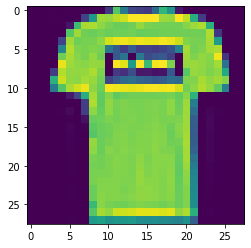

In [226]:
(train_img, train_label) , (test_img, test_label) = fashion_mnist.load_data()
print(len(train_img))
print(len(train_label))
print(len(test_img))
 	
plt.imshow(train_img[1])

##Showing 10 first pictures with their labels

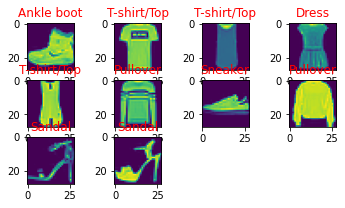

In [227]:
classes = ['T-shirt/Top','Trouser', 'Pullover', 'Dress', 'Coat' , 'Sandal' , 'Shirt', 'Sneaker', 'Bag' , 'Ankle boot' ]
for i in range(10):
    # f, t = train_img[i]
    plt.subplot(4, 4, i+1)
    plt.imshow(train_img[i])
    # print(classes[i])
    plt.title(classes[train_label[i]], color = 'red')

# index = 27
# for i in range(len(train_label)):
#   if train_label[i] == 8:
#     plt.imshow(train_img[i])
    # break
# plt.imshow(train_img[index])
# print(train_label[index])

## Reshape pictures

In [0]:
# print(train_label[1])
# print(train_label[0])

train_img = train_img.reshape(60000, 784)
test_img = test_img.reshape(10000, 784)

test_img = test_img.astype('float64')
train_img = train_img.astype('float64')

## Pictures Normalization

In [0]:
normalization = MinMaxScaler(feature_range = (0, 1), copy = True)
train_img = normalization.fit_transform(train_img)
test_img = normalization.transform(test_img)
train_label = to_categorical(train_label, 10)
test_label = to_categorical(test_label, 10)

## Define the network

In [0]:
def make_network():
  network = Sequential()
  network.add(Dense(1100, activation = 'relu', input_shape = (784, )))
  network.add(Dense(900, activation= 'relu'))
  network.add(Dense(10, activation = 'softmax'))
  network.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.SGD(learning_rate = 0.001), metrics= ['accuracy'])
  return network

In [0]:
t1 = time.time()
network = make_network()
t2 = time.time()

In [222]:
BestModel = 'CNNbestmodel.h5'
callbacks = [ModelCheckpoint(BestModel, monitor = 'val_accuracy', save_best_only = True, mode = 'max', verbose = 0)]

trained_network = network.fit(train_img, train_label, batch_size = 32, epochs = 50, callbacks = callbacks, validation_split = 0.1, verbose = 1)

Epoch 1/50
1688/1688 [==============================] - 16s 9ms/step - loss: 1.3116 - accuracy: 0.6362 - val_loss: 0.8821 - val_accuracy: 0.7377
Epoch 2/50
1688/1688 [==============================] - 17s 10ms/step - loss: 0.7908 - accuracy: 0.7586 - val_loss: 0.7005 - val_accuracy: 0.7780
Epoch 3/50
1688/1688 [==============================] - 17s 10ms/step - loss: 0.6707 - accuracy: 0.7900 - val_loss: 0.6248 - val_accuracy: 0.7972
Epoch 4/50
1688/1688 [==============================] - 18s 10ms/step - loss: 0.6087 - accuracy: 0.8065 - val_loss: 0.5786 - val_accuracy: 0.8088
Epoch 5/50
1688/1688 [==============================] - 17s 10ms/step - loss: 0.5687 - accuracy: 0.8167 - val_loss: 0.5446 - val_accuracy: 0.8188
Epoch 6/50
1688/1688 [==============================] - 18s 11ms/step - loss: 0.5407 - accuracy: 0.8222 - val_loss: 0.5283 - val_accuracy: 0.8212
Epoch 7/50
1688/1688 [==============================] - 18s 11ms/step - loss: 0.5200 - accuracy: 0.8281 - val_loss: 0.5088 - 

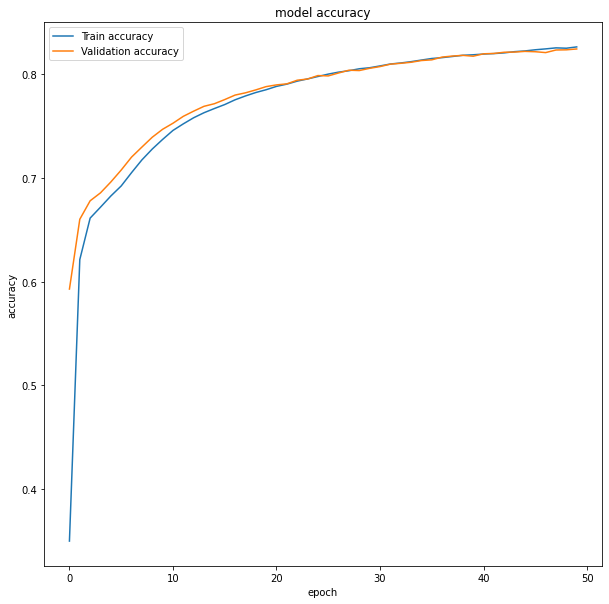

In [215]:
# print(trained_network.history['loss'])
loss_plt = plt.figure(figsize = (10, 10))
plt.plot(trained_network.history['accuracy'])
plt.plot(trained_network.history["val_accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["Train accuracy", "Validation accuracy"])
plt.show()

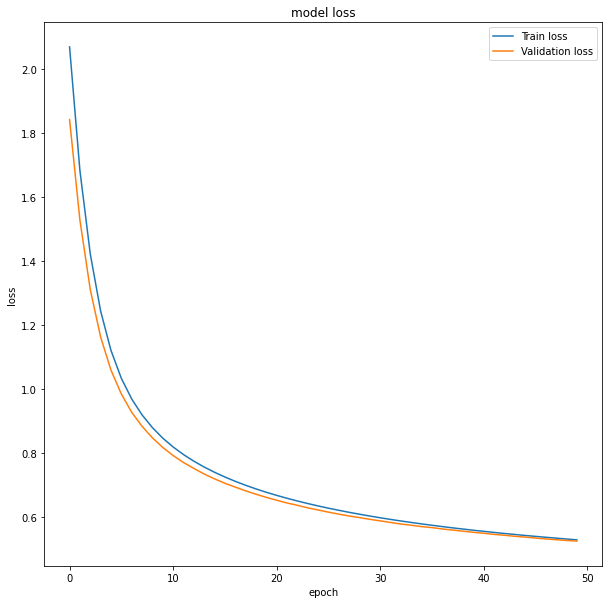

In [216]:
loss_plt = plt.figure(figsize = (10, 10))
plt.plot(trained_network.history['loss'])
plt.plot(trained_network.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(["Train loss", "Validation loss"])
plt.show()



In [223]:
  # print(type(test_img))
  # print(type(test_label))
  test_loss, test_acc = network.evaluate(test_img, test_label, verbose = 0)
  print("loss in test data is: ", test_loss)
  print("accuracy in test data is : ", test_acc)
  print(t2 - t1)
  # print(t1)

loss in test data is:  0.3950020670890808
accuracy in test data is :  0.8626000285148621
0.05453991889953613


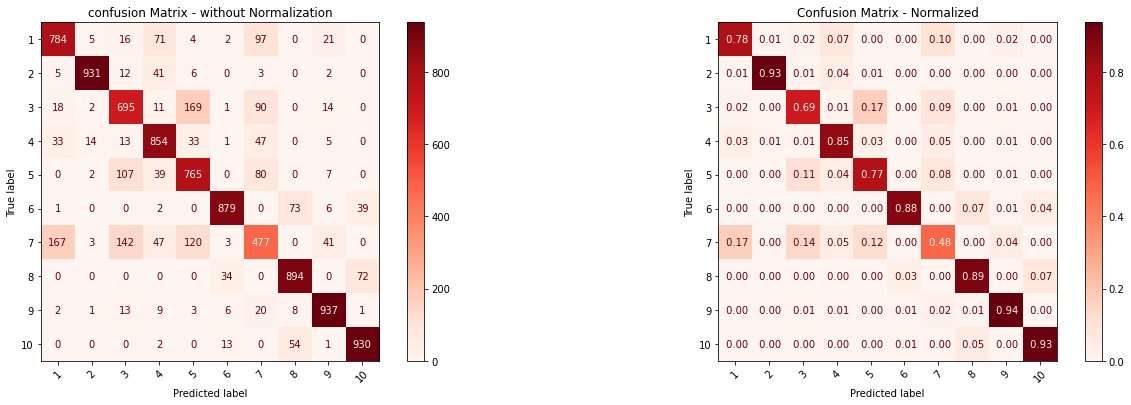

In [219]:

labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
real_label = np.argmax(test_label, axis = 1)
predicted_label = np.argmax(network.predict(test_img), axis = 1)

cm = confusion_matrix(real_label, predicted_label)
normalized_cm = confusion_matrix(real_label, predicted_label, normalize = 'true')
fig, ax = plt.subplots(nrows = 1, ncols = 2)
fig.subplots_adjust(right = 3, top = 1.3)
ax[0].title.set_text("confusion Matrix - without Normalization")
ConfusionMatrixDisplay(cm, labels).plot(cmap = plt.cm.Reds, values_format = 'd', xticks_rotation = 45, ax = ax[0])
ax[1].title.set_text("Confusion Matrix - Normalized")
ConfusionMatrixDisplay(normalized_cm, labels).plot(cmap = plt.cm.Reds, values_format = ' .2f', xticks_rotation = 45, ax = ax[1])